In [2]:
# Cleaning the data
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from collections import Counter

In [3]:
# dataframe input

df_listings = pd.read_csv('listings.csv')
df_calendar = pd.read_csv('calendar.csv')
df_reviews = pd.read_csv('reviews.csv')

In [4]:
df_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [5]:
df_calendar

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN
...,...,...,...,...
1308885,14504422,2016-09-10,f,NaN
1308886,14504422,2016-09-09,f,NaN
1308887,14504422,2016-09-08,f,NaN
1308888,14504422,2016-09-07,f,NaN


In [6]:
df_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [7]:
df1 = df_listings[['id', 'name',  'host_listings_count', 'host_total_listings_count',   'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city',  'zipcode', 
     'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 
       'price',  'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 
         'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 
         'review_scores_value', 'calculated_host_listings_count', 'reviews_per_month']]

# Most Popular Places in Boston 

In [9]:
df1 = df1[df1['city']=='Boston']
number_df1 = df1[['id', 'host_listings_count', 'zipcode', 'neighbourhood_cleansed','number_of_reviews','calculated_host_listings_count', 'reviews_per_month']]
number_df1

,id,host_listings_count,zipcode,neighbourhood_cleansed,number_of_reviews,calculated_host_listings_count,reviews_per_month
0,12147973,1,02131,Roslindale,0,1,NaN
1,3075044,1,02131,Roslindale,36,1,1.30
2,6976,1,02131,Roslindale,41,1,0.47
3,1436513,1,NaN,Roslindale,1,1,1.00
4,7651065,1,02131,Roslindale,29,1,2.25
...,...,...,...,...,...,...,...
3534,8921130,1,02134,Allston,2,1,0.26
3535,10436811,1,02134,Allston,0,1,NaN
3557,14604429,1,NaN,Longwood Medical Area,0,1,NaN
3559,12915510,1,02129,Charlestown,4,1,1.28


### Plot of Number of reviews per zipcode

Text(0, 0.5, 'Number of Reviews')

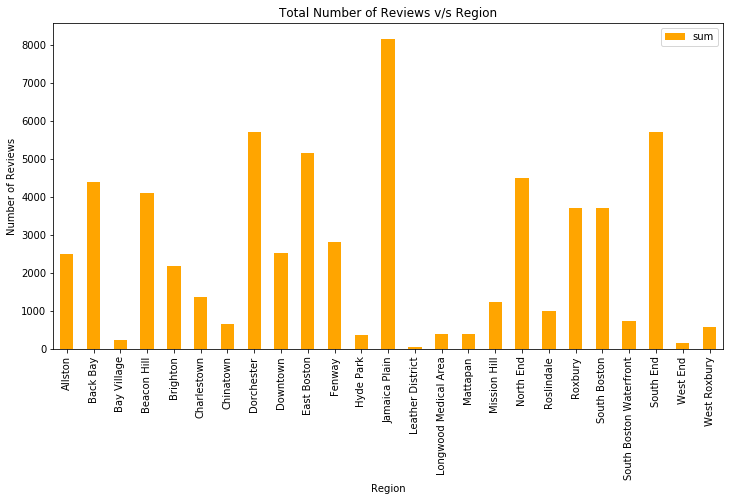

In [10]:
number_df1.groupby('neighbourhood_cleansed')['number_of_reviews'].agg(['sum']).plot.bar(color = 'orange', figsize =(12,6),title = 'Total Number of Reviews v/s Region')
plt.xlabel('Region')
plt.ylabel('Number of Reviews')

### Plot of Number of reviews per month per zipcode

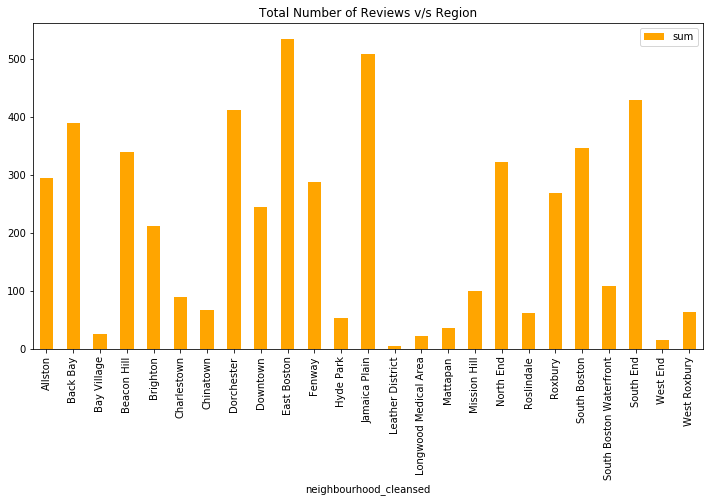

In [12]:
number_df1.groupby('neighbourhood_cleansed')['reviews_per_month'].agg(['sum']).plot.bar(color = 'orange', figsize =(12,6),title = 'Total Number of Reviews v/s Region')

# Average price per zipcode

In [14]:
price_df1 = df1[['id', 'zipcode', 'neighbourhood_cleansed', 'price', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms']]
price_df1

,id,zipcode,neighbourhood_cleansed,price,property_type,room_type,accommodates,bathrooms,bedrooms
0,12147973,02131,Roslindale,$250.00,House,Entire home/apt,4,1.5,2.0
1,3075044,02131,Roslindale,$65.00,Apartment,Private room,2,1.0,1.0
2,6976,02131,Roslindale,$65.00,Apartment,Private room,2,1.0,1.0
3,1436513,NaN,Roslindale,$75.00,House,Private room,4,1.0,1.0
4,7651065,02131,Roslindale,$79.00,House,Private room,2,1.5,1.0
...,...,...,...,...,...,...,...,...,...
3534,8921130,02134,Allston,$129.00,Apartment,Entire home/apt,2,1.0,1.0
3535,10436811,02134,Allston,$50.00,Apartment,Private room,2,1.0,1.0
3557,14604429,NaN,Longwood Medical Area,$60.00,Apartment,Private room,2,1.0,1.0
3559,12915510,02129,Charlestown,$229.00,Boat,Private room,7,1.0,1.0


In [15]:
price_df1['price']= price_df1['price'].str.replace('$','')
price_df1['price']= price_df1['price'].str.replace(',','')
price_df1

C:\Users\Aman\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Aman\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,id,zipcode,neighbourhood_cleansed,price,property_type,room_type,accommodates,bathrooms,bedrooms
0,12147973,02131,Roslindale,250.00,House,Entire home/apt,4,1.5,2.0
1,3075044,02131,Roslindale,65.00,Apartment,Private room,2,1.0,1.0
2,6976,02131,Roslindale,65.00,Apartment,Private room,2,1.0,1.0
3,1436513,NaN,Roslindale,75.00,House,Private room,4,1.0,1.0
4,7651065,02131,Roslindale,79.00,House,Private room,2,1.5,1.0
...,...,...,...,...,...,...,...,...,...
3534,8921130,02134,Allston,129.00,Apartment,Entire home/apt,2,1.0,1.0
3535,10436811,02134,Allston,50.00,Apartment,Private room,2,1.0,1.0
3557,14604429,NaN,Longwood Medical Area,60.00,Apartment,Private room,2,1.0,1.0
3559,12915510,02129,Charlestown,229.00,Boat,Private room,7,1.0,1.0


In [16]:
price_df1['price'] = price_df1.price.astype(float)
price_df1['accommodates'] = price_df1.accommodates.astype(float)

price_df1['price_per_accomodates'] = price_df1['price']/price_df1['accommodates']
price_df1


C:\Users\Aman\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Aman\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Aman\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

,id,zipcode,neighbourhood_cleansed,price,property_type,room_type,accommodates,bathrooms,bedrooms,price_per_accomodates
0,12147973,02131,Roslindale,250.0,House,Entire home/apt,4.0,1.5,2.0,62.500000
1,3075044,02131,Roslindale,65.0,Apartment,Private room,2.0,1.0,1.0,32.500000
2,6976,02131,Roslindale,65.0,Apartment,Private room,2.0,1.0,1.0,32.500000
3,1436513,NaN,Roslindale,75.0,House,Private room,4.0,1.0,1.0,18.750000
4,7651065,02131,Roslindale,79.0,House,Private room,2.0,1.5,1.0,39.500000
...,...,...,...,...,...,...,...,...,...,...
3534,8921130,02134,Allston,129.0,Apartment,Entire home/apt,2.0,1.0,1.0,64.500000
3535,10436811,02134,Allston,50.0,Apartment,Private room,2.0,1.0,1.0,25.000000
3557,14604429,NaN,Longwood Medical Area,60.0,Apartment,Private room,2.0,1.0,1.0,30.000000
3559,12915510,02129,Charlestown,229.0,Boat,Private room,7.0,1.0,1.0,32.714286


### Accomodation price per person in different zipcodes

Text(0, 0.5, 'Price per Accomodate')

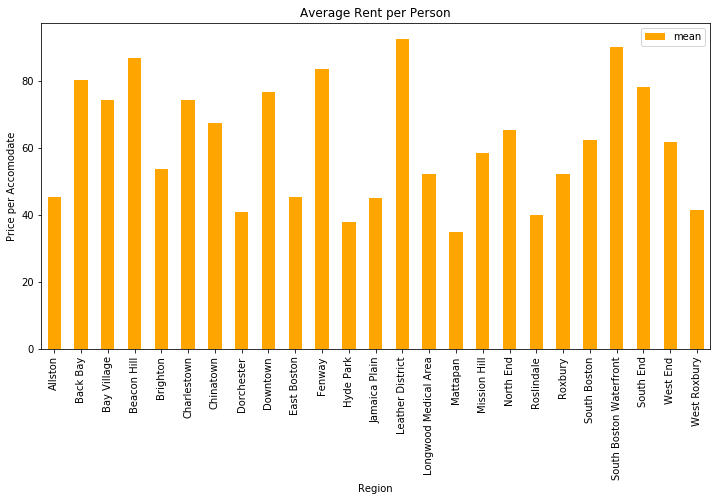

In [17]:
price_df1.groupby('neighbourhood_cleansed')['price_per_accomodates'].agg(['mean']).plot.bar(color = 'orange', figsize =(12,6),title = 'Average Rent per Person')
plt.xlabel('Region')
plt.ylabel('Price per Accomodate')

# Features affecting average price of Airbnb

In [27]:
features_df1 = df1[['id', 'neighbourhood_cleansed', 'zipcode', 'property_type', 'room_type', 'accommodates', 
        'bathrooms', 'bedrooms',  'price']]

In [28]:
features_df1  = pd.concat([features_df1, price_df1['price_per_accomodates']], axis = 1).round(decimals=2)
features_df1

,id,neighbourhood_cleansed,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,price,price_per_accomodates
0,12147973,Roslindale,02131,House,Entire home/apt,4,1.5,2.0,$250.00,62.50
1,3075044,Roslindale,02131,Apartment,Private room,2,1.0,1.0,$65.00,32.50
2,6976,Roslindale,02131,Apartment,Private room,2,1.0,1.0,$65.00,32.50
3,1436513,Roslindale,NaN,House,Private room,4,1.0,1.0,$75.00,18.75
4,7651065,Roslindale,02131,House,Private room,2,1.5,1.0,$79.00,39.50
...,...,...,...,...,...,...,...,...,...,...
3534,8921130,Allston,02134,Apartment,Entire home/apt,2,1.0,1.0,$129.00,64.50
3535,10436811,Allston,02134,Apartment,Private room,2,1.0,1.0,$50.00,25.00
3557,14604429,Longwood Medical Area,NaN,Apartment,Private room,2,1.0,1.0,$60.00,30.00
3559,12915510,Charlestown,02129,Boat,Private room,7,1.0,1.0,$229.00,32.71


In [29]:
features_df1['property_type'].unique()

array(['House', 'Apartment', 'Condominium', 'Villa', 'Bed & Breakfast',
       'Townhouse', 'Entire Floor', 'Loft', 'Guesthouse', 'Boat', 'Dorm',
       'Other', nan], dtype=object)

### Property type vs price per accomodates

Text(0, 0.5, 'Price per Accomodate')

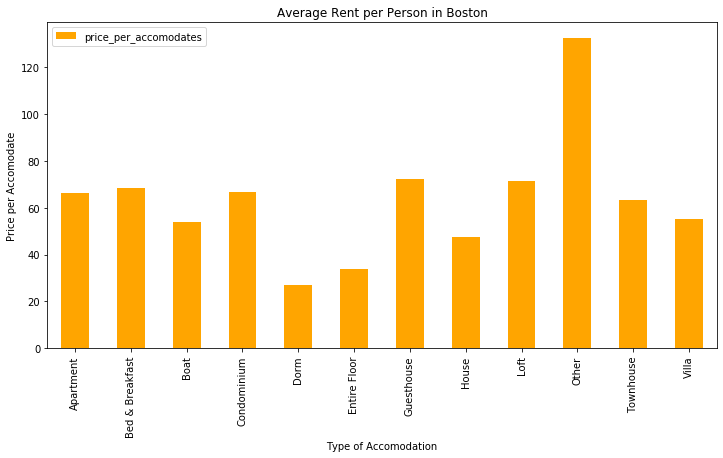

In [30]:
features_df1.groupby('property_type').agg({'price_per_accomodates':'mean'}).plot.bar(color = 'orange', figsize =(12,6),title = 'Average Rent per Person in Boston')
plt.xlabel('Type of Accomodation')
plt.ylabel('Price per Accomodate')

Text(0, 0.5, 'Price per Accomodate')

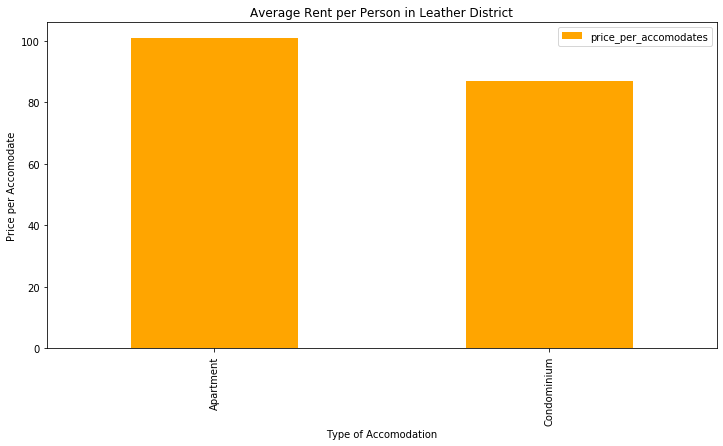

In [31]:
features_df1[features_df1.neighbourhood_cleansed == 'Leather District'].groupby('property_type').agg({'price_per_accomodates':'mean'}).plot.bar(color = 'orange', figsize =(12,6),title = 'Average Rent per Person in Leather District')
plt.xlabel('Type of Accomodation')
plt.ylabel('Price per Accomodate')

Text(0, 0.5, 'Price per Accomodate')

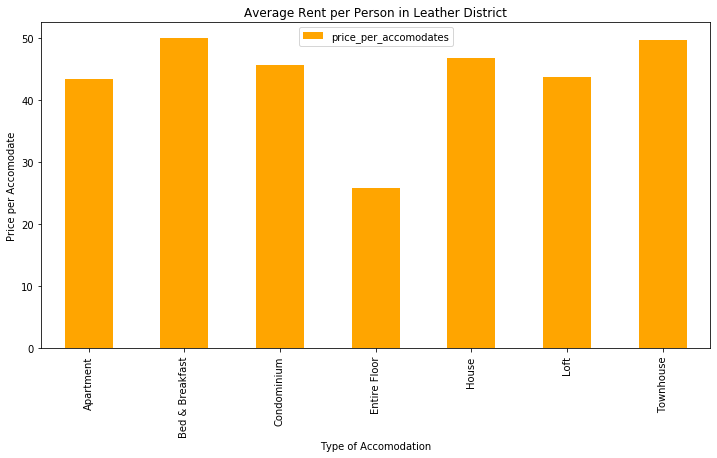

In [32]:
features_df1[features_df1.neighbourhood_cleansed == 'Jamaica Plain'].groupby('property_type').agg({'price_per_accomodates':'mean'}).plot.bar(color = 'orange', figsize =(12,6),title = 'Average Rent per Person in Leather District')
plt.xlabel('Type of Accomodation')
plt.ylabel('Price per Accomodate')